# Variância

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
dataset = pd.read_csv('acoes.csv')
dataset

,Date,GOL,CVC,WEG,MGLU,TOTVS,IBOV
0,2015-01-02,14.99,11.164607,4.988705,2.058074,10.155536,47.259998
1,2015-01-05,14.85,11.017703,5.022718,2.096750,9.843493,46.320000
2,2015-01-06,15.21,10.870803,4.948212,2.069124,9.227921,46.580002
3,2015-01-07,14.55,10.775316,4.891521,2.138187,9.162673,48.150002
4,2015-01-08,14.27,10.393366,4.974128,2.121612,9.375432,48.509998
...,...,...,...,...,...,...,...
2477,2025-01-27,1.71,1.860000,53.310001,7.010000,31.209999,121.870003
2478,2025-01-28,1.71,1.770000,54.090000,6.760000,30.790001,121.029999
2479,2025-01-29,1.69,1.800000,54.430000,6.590000,31.150000,120.169998
2480,2025-01-30,1.70,1.950000,56.209999,7.270000,32.610001,123.949997


In [3]:
taxas_cvc = np.array([-11.86, 63.73, 74.52, 20.42, -33.29, -128.06])

In [4]:
media_cvc = taxas_cvc.sum() / len(taxas_cvc)
media_cvc

np.float64(-2.423333333333332)

In [5]:
((taxas_cvc - media_cvc) ** 2).sum() / len(taxas_cvc)

np.float64(4607.455288888889)

In [6]:
media_cvc = taxas_cvc.mean()
media_cvc

np.float64(-2.423333333333332)

In [7]:
variancia_cvc = taxas_cvc.var()
variancia_cvc

np.float64(4607.455288888889)

In [8]:
taxas_mglu = np.array([-135.37, 176.76, 185.78, 82.74, 71.86, 71.87])
variancia_mglu = taxas_mglu.var()
variancia_mglu

np.float64(11160.033122222221)

### Calculando a variância baseada no preço por período

In [9]:
dataset['CVC'].tail(330).var(), dataset['MGLU'].tail(330).var()

(np.float64(0.43134472373142413), np.float64(21.33824753324378))

## Desvio Padrão

In [10]:
desvio_cvc = math.sqrt(variancia_cvc)
desvio_cvc

67.87823869907712

In [11]:
desvio_mglu = math.sqrt(variancia_mglu)
desvio_mglu

105.6410579378218

In [12]:
taxas_cvc.std()

np.float64(67.87823869907712)

In [13]:
taxas_mglu.std()

np.float64(105.6410579378218)

In [14]:
dataset['CVC'].tail(330).std(), dataset['MGLU'].tail(330).std()

(np.float64(0.6567683942847921), np.float64(4.619334100630066))

## Coeficiente de variação

In [15]:
desvio_cvc, media_cvc

(67.87823869907712, np.float64(-2.423333333333332))

In [16]:
coeficiente_variacao_cvc = (desvio_cvc / media_cvc) * 100
coeficiente_variacao_cvc

np.float64(-2801.0277317363334)

In [17]:
stats.variation(taxas_cvc) * 100

np.float64(-2801.0277317363334)

In [18]:
stats.variation(taxas_mglu) * 100

np.float64(139.72452773717723)

## Calculos com todas as ações

In [19]:
dataset.drop(labels = ['Date'], axis=1, inplace = True)
dataset

,GOL,CVC,WEG,MGLU,TOTVS,IBOV
0,14.99,11.164607,4.988705,2.058074,10.155536,47.259998
1,14.85,11.017703,5.022718,2.096750,9.843493,46.320000
2,15.21,10.870803,4.948212,2.069124,9.227921,46.580002
3,14.55,10.775316,4.891521,2.138187,9.162673,48.150002
4,14.27,10.393366,4.974128,2.121612,9.375432,48.509998
...,...,...,...,...,...,...
2477,1.71,1.860000,53.310001,7.010000,31.209999,121.870003
2478,1.71,1.770000,54.090000,6.760000,30.790001,121.029999
2479,1.69,1.800000,54.430000,6.590000,31.150000,120.169998
2480,1.70,1.950000,56.209999,7.270000,32.610001,123.949997


In [20]:
taxas_retorno = ( dataset / dataset.shift(1)) - 1
taxas_retorno

,GOL,CVC,WEG,MGLU,TOTVS,IBOV
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014834,-0.013176,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011457,0.033378,-0.007071,0.033705
4,-0.019244,-0.035447,0.016888,-0.007752,0.023220,0.007477
...,...,...,...,...,...,...
2477,0.000000,0.044944,-0.078797,0.100471,0.043464,0.020260
2478,0.000000,-0.048387,0.014631,-0.035663,-0.013457,-0.006893
2479,-0.011696,0.016949,0.006286,-0.025148,0.011692,-0.007106
2480,0.005917,0.083333,0.032703,0.103187,0.046870,0.031455


### Desvio Padrão

In [21]:
taxas_retorno.std() * 100

GOL      4.808034
CVC      3.924151
WEG      2.117892
MGLU     4.307800
TOTVS    2.411075
IBOV     1.534443
dtype: float64

In [22]:
taxas_retorno.std() * 246

GOL      11.827764
CVC       9.653412
WEG       5.210015
MGLU     10.597187
TOTVS     5.931244
IBOV      3.774730
dtype: float64

### Anualizar

In [23]:
taxas_retorno.std() * math.sqrt(246)

GOL      0.754111
CVC      0.615479
WEG      0.332178
MGLU     0.675652
TOTVS    0.378162
IBOV     0.240668
dtype: float64

## Correlação entre as ações

In [24]:
dataset

,GOL,CVC,WEG,MGLU,TOTVS,IBOV
0,14.99,11.164607,4.988705,2.058074,10.155536,47.259998
1,14.85,11.017703,5.022718,2.096750,9.843493,46.320000
2,15.21,10.870803,4.948212,2.069124,9.227921,46.580002
3,14.55,10.775316,4.891521,2.138187,9.162673,48.150002
4,14.27,10.393366,4.974128,2.121612,9.375432,48.509998
...,...,...,...,...,...,...
2477,1.71,1.860000,53.310001,7.010000,31.209999,121.870003
2478,1.71,1.770000,54.090000,6.760000,30.790001,121.029999
2479,1.69,1.800000,54.430000,6.590000,31.150000,120.169998
2480,1.70,1.950000,56.209999,7.270000,32.610001,123.949997


In [25]:
taxas_retorno

,GOL,CVC,WEG,MGLU,TOTVS,IBOV
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014834,-0.013176,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011457,0.033378,-0.007071,0.033705
4,-0.019244,-0.035447,0.016888,-0.007752,0.023220,0.007477
...,...,...,...,...,...,...
2477,0.000000,0.044944,-0.078797,0.100471,0.043464,0.020260
2478,0.000000,-0.048387,0.014631,-0.035663,-0.013457,-0.006893
2479,-0.011696,0.016949,0.006286,-0.025148,0.011692,-0.007106
2480,0.005917,0.083333,0.032703,0.103187,0.046870,0.031455


### Covariância

In [26]:
taxas_retorno.cov()

,GOL,CVC,WEG,MGLU,TOTVS,IBOV
GOL,0.002312,0.000982,0.000287,0.000688,0.000381,0.000410
CVC,0.000982,0.001540,0.000210,0.000685,0.000329,0.000314
WEG,0.000287,0.000210,0.000449,0.000231,0.000190,0.000164
MGLU,0.000688,0.000685,0.000231,0.001856,0.000369,0.000306
TOTVS,0.000381,0.000329,0.000190,0.000369,0.000581,0.000186
IBOV,0.000410,0.000314,0.000164,0.000306,0.000186,0.000235


In [27]:
taxas_retorno.corr()

,GOL,CVC,WEG,MGLU,TOTVS,IBOV
GOL,1.000000,0.520487,0.281637,0.332116,0.328552,0.555733
CVC,0.520487,1.000000,0.253208,0.404946,0.347354,0.521877
WEG,0.281637,0.253208,1.000000,0.252779,0.371792,0.503127
MGLU,0.332116,0.404946,0.252779,1.000000,0.355624,0.463547
TOTVS,0.328552,0.347354,0.371792,0.355624,1.000000,0.502071
IBOV,0.555733,0.521877,0.503127,0.463547,0.502071,1.000000


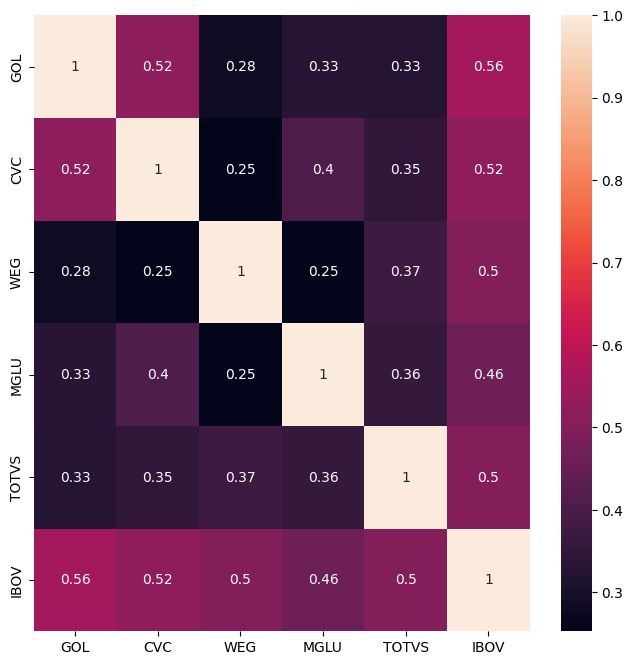

In [28]:
plt.figure(figsize=(8, 8))
sns.heatmap(taxas_retorno.corr(), annot=True);

## Risco do portfólio

### Somente duas ações

In [29]:
taxas_retorno

,GOL,CVC,WEG,MGLU,TOTVS,IBOV
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014834,-0.013176,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011457,0.033378,-0.007071,0.033705
4,-0.019244,-0.035447,0.016888,-0.007752,0.023220,0.007477
...,...,...,...,...,...,...
2477,0.000000,0.044944,-0.078797,0.100471,0.043464,0.020260
2478,0.000000,-0.048387,0.014631,-0.035663,-0.013457,-0.006893
2479,-0.011696,0.016949,0.006286,-0.025148,0.011692,-0.007106
2480,0.005917,0.083333,0.032703,0.103187,0.046870,0.031455


In [30]:
taxas_retorno_gol_cvc = taxas_retorno.drop(columns=['WEG', 'MGLU', 'TOTVS', 'IBOV'])
taxas_retorno_gol_cvc

,GOL,CVC
0,NaN,NaN
1,-0.009340,-0.013158
2,0.024242,-0.013333
3,-0.043392,-0.008784
4,-0.019244,-0.035447
...,...,...
2477,0.000000,0.044944
2478,0.000000,-0.048387
2479,-0.011696,0.016949
2480,0.005917,0.083333


In [31]:
taxas_retorno_gol_cvc.cov()

,GOL,CVC
GOL,0.002312,0.000982
CVC,0.000982,0.001540


In [32]:
taxas_retorno_gol_cvc.cov() * 246

,GOL,CVC
GOL,0.568683,0.241579
CVC,0.241579,0.378814


In [33]:
pesos = np.array([0.5, 0.5])

### Multiplicar as matrizes

In [35]:
np.dot((taxas_retorno_gol_cvc.cov() * 246), pesos)

array([0.40513072, 0.31019648])

In [36]:
np.dot(pesos, np.dot((taxas_retorno_gol_cvc.cov() * 246), pesos))

np.float64(0.3576636008646658)

#### Desvio Padrão

In [37]:
math.sqrt(np.dot(pesos, np.dot((taxas_retorno_gol_cvc.cov() * 246), pesos)))

0.5980498314226548

### Todas as ações

In [38]:
dataset.columns

Index(['GOL', 'CVC', 'WEG', 'MGLU', 'TOTVS', 'IBOV'], dtype='object')

In [39]:
pesos1 = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0])
pesos1.sum()

np.float64(1.0)

In [42]:
taxas_retorno.cov() * 246

,GOL,CVC,WEG,MGLU,TOTVS,IBOV
GOL,0.568683,0.241579,0.070550,0.169219,0.093695,0.100860
CVC,0.241579,0.378814,0.051768,0.168397,0.080847,0.077304
WEG,0.070550,0.051768,0.110342,0.056733,0.046704,0.040222
MGLU,0.169219,0.168397,0.056733,0.456506,0.090864,0.075376
TOTVS,0.093695,0.080847,0.046704,0.090864,0.143007,0.045694
IBOV,0.100860,0.077304,0.040222,0.075376,0.045694,0.057921


In [43]:
np.dot((taxas_retorno.cov() * 246), pesos1)

array([0.22874498, 0.18428096, 0.06721941, 0.18834361, 0.09102328,
       0.06789137])

In [45]:
variancia_portfolio1 = np.dot(pesos1, np.dot((taxas_retorno.cov() * 246), pesos1))
variancia_portfolio1

np.float64(0.1519224491036972)

In [47]:
volatilidade_portfolio1 = math.sqrt(variancia_portfolio1) * 100
volatilidade_portfolio1

38.97723041773199

In [ ]:
pesos2 = np.array([0, 0, 0, 0, 0, 1])
pesos2.sum()

np.int64(1)

In [51]:
variancia_portfolio2 = np.dot(pesos2, np.dot(taxas_retorno.cov() * 246, pesos2))
variancia_portfolio2

np.float64(0.05792107864064731)

In [53]:
volatilidade_portfolio2 = math.sqrt(variancia_portfolio2)
volatilidade_portfolio2

0.2406679842451989

## Risco sistemático e não sistemático